<a href="https://colab.research.google.com/github/yogasgm/data-science-machine-learning-BI/blob/main/ML/001_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Classification: Insurance Fraud Detection**

This notebook will introduce various classification techniques for predicting fraudulent insurance claims. We will explore multiple classification algorithms, compare their performances, and apply hyperparameter tuning to enhance model accuracy.

## **Classification Models Covered in This Notebook**
We will implement and evaluate the following classification models:

- **Support Vector Classifier (SVC)**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree Classifier**
- **Random Forest Classifier**
- **AdaBoost Classifier**
- **Gradient Boosting Classifier**
- **Stochastic Gradient Boosting (SGB)**
- **XGBoost**
- **CatBoost Classifier**
- **Extra Trees Classifier**
- **LGBM Classifier**
- **Voting Classifier**

Each of these models has its strengths and weaknesses, and we will compare their performances using evaluation metrics such as accuracy, precision, recall, and F1-score.

## About the Dataset
The dataset contains information about insurance claims, including various features that can be used to predict whether a claim is fraudulent or not. Below is a description of the columns in the dataset:

* `months_as_customer`: Number of months the customer has been with the insurance company.
* `age`: Age of the insured person.
* `policy_number`: Unique identifier for the insurance policy.
* `policy_bind_date`: Date when the policy was activated.
* `policy_state`: State where the policy is registered.
* `policy_csl`: Combined Single Limit (CSL) of the policy.
* `policy_deductable`: Deductible amount for the policy.
* `policy_annual_premium`: Annual premium amount for the policy.
* `umbrella_limit`: Coverage limit for an umbrella policy.
* `insured_zip`: ZIP code of the insured person.
* `insured_sex`: Gender of the insured person.
* `insured_education_level`: Education level of the insured person.
* `insured_occupation`: Occupation of the insured person.
* `insured_hobbies`: Hobbies of the insured person.
* `insured_relationship`: Relationship status of the insured person.
* `capital-gains`: Capital gains reported by the insured person.
* `capital-loss`: Capital losses reported by the insured person.
* `incident_date`: Date when the incident occurred.
* `incident_type`: Type of incident (e.g., collision, theft).
* `collision_type`: Type of collision (if applicable).
* `incident_severity`: Severity of the incident.
* `authorities_contacted`: Authorities contacted after the incident.
* `incident_state`: State where the incident occurred.
* `incident_city`: City where the incident occurred.
* `incident_location`: Location of the incident.
* `incident_hour_of_the_day`: Hour of the day when the incident occurred.
* `number_of_vehicles_involved`: Number of vehicles involved in the incident.
* `property_damage`: Indicates whether there was property damage.
* `bodily_injuries`: Number of bodily injuries reported.
* `witnesses`: Number of witnesses to the incident.
* `police_report_available`: Indicates whether a police report is available.
* `total_claim_amount`: Total amount claimed for the incident.
* `injury_claim`: Amount claimed for injuries.
* `property_claim`: Amount claimed for property damage.
* `vehicle_claim`: Amount claimed for vehicle damage.
* `auto_make`: Make of the insured vehicle.
* `auto_model`: Model of the insured vehicle.
* `auto_year`: Year of manufacture of the insured vehicle.
* `fraud_reported`: Target variable indicating whether the claim was fraudulent (`Y` or `N`).

## **Importing Required Libraries**
We will start by importing the necessary Python libraries for data manipulation, visualization, and machine learning model development.

In [66]:
!pip install catboost --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## **Loading the Dataset**
The dataset will be loaded using pandas.read_csv() to facilitate further analysis.

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/yogasgm/data-science-machine-learning-BI/refs/heads/main/dataset/insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [68]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [69]:
# Display basic statistics of the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


## **Handling Missing Values**
Some features in the dataset may contain missing values. We will handle them by:

* Filling categorical missing values using the mode.

In [70]:
# Check for missing values
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [71]:
# Fill missing values in categorical columns with the mode
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

# Verify that missing values have been handled
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


## **Feature Correlation & Selection**
A heatmap will be generated to analyze correlations among numerical features. This step will help identify redundant features that might affect model performance.

Certain columns will be removed due to high correlation or lack of predictive value.

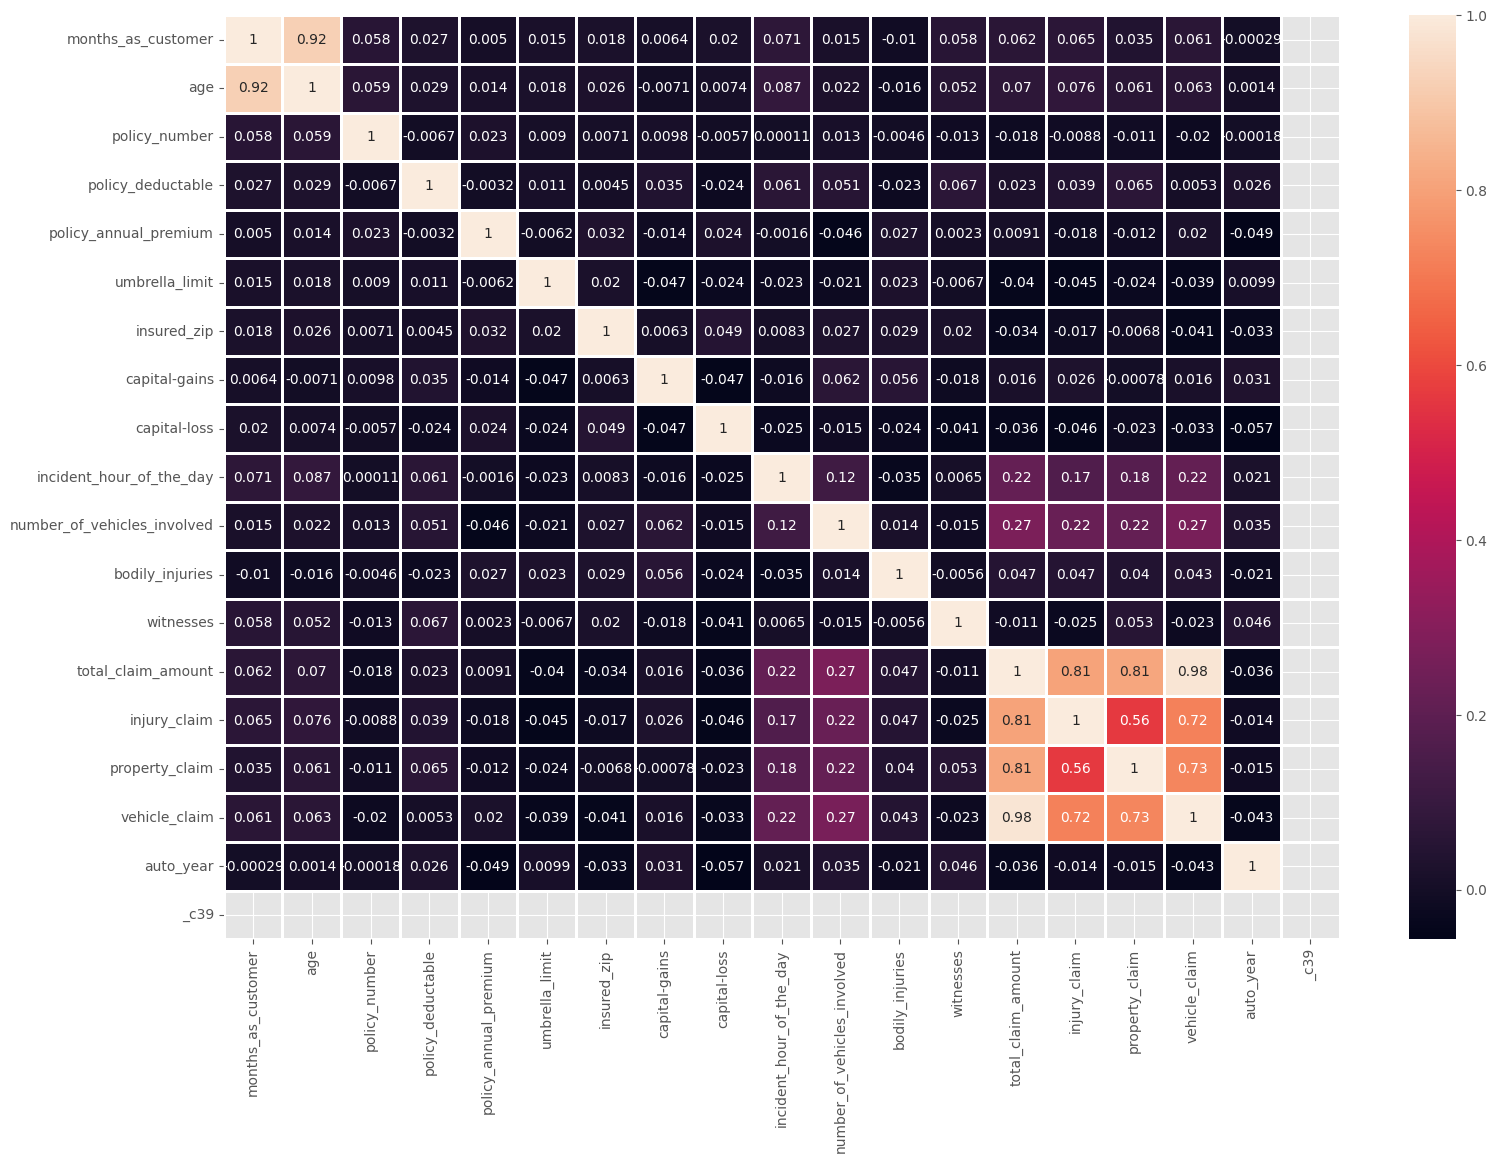

In [72]:
# Generate a heatmap to visualize correlations

plt.figure(figsize = (18, 12))

# Exclude policy_bind_date (date format)
corr = df.select_dtypes(include=['number']).corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [73]:
# Dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [74]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


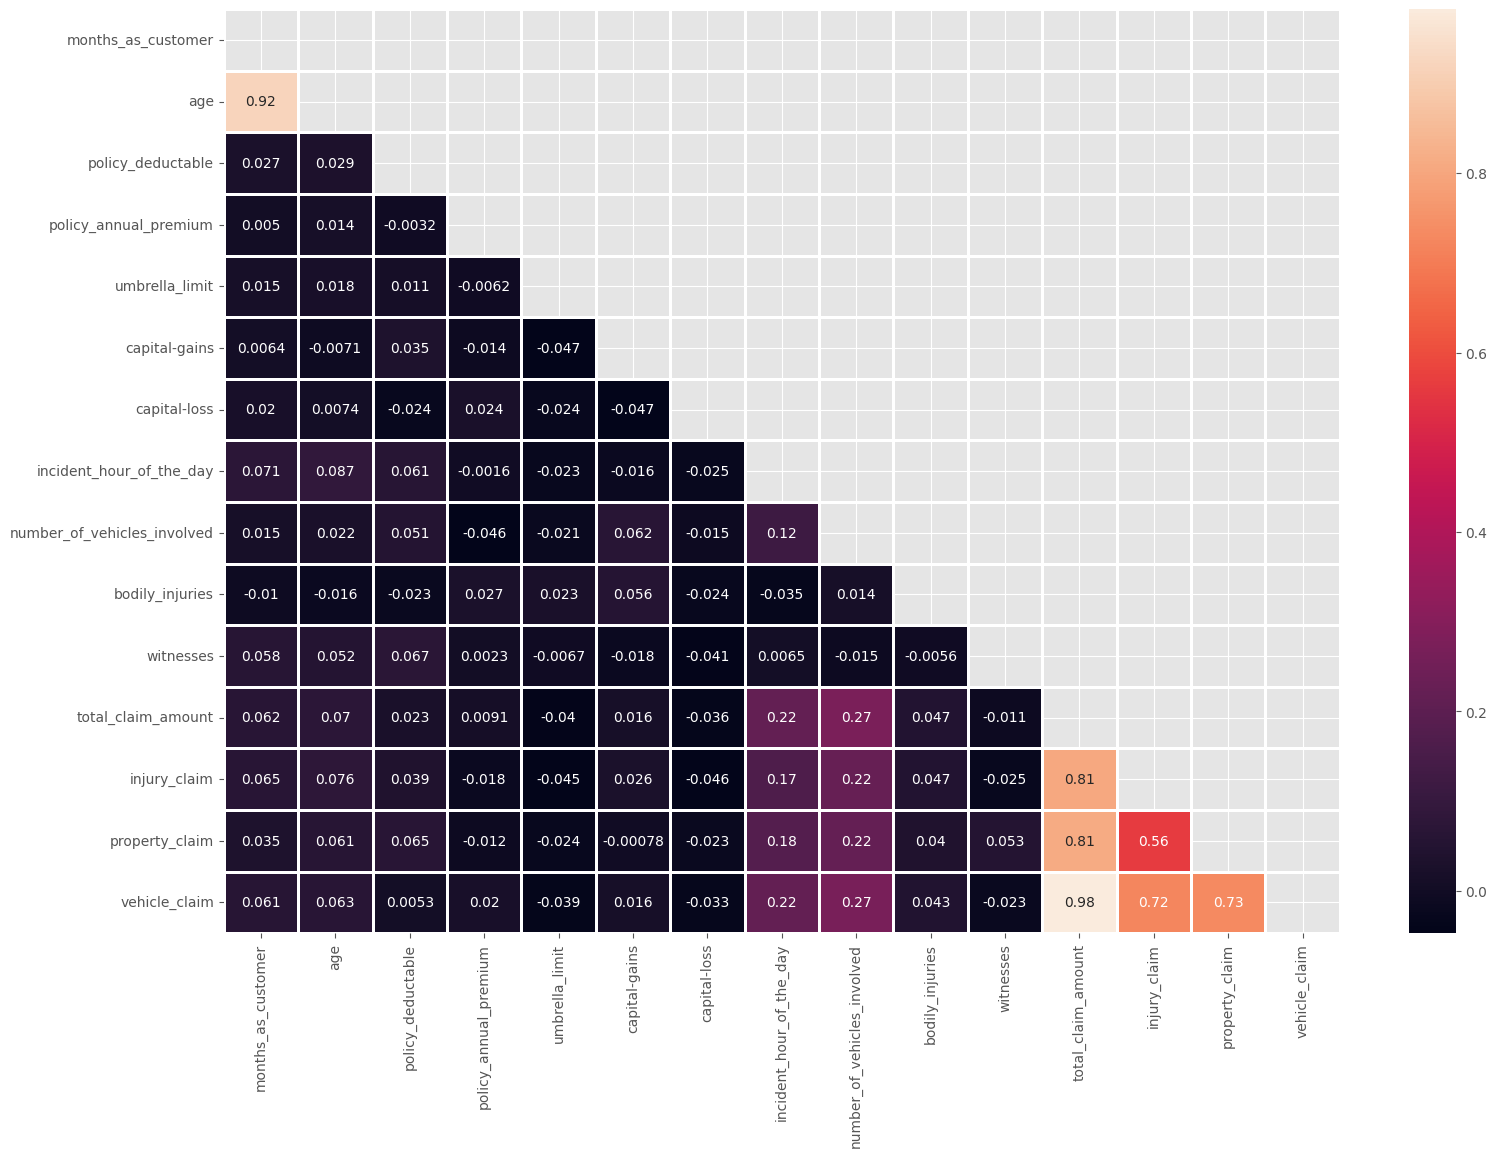

In [75]:
# Checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.select_dtypes(include=['number']).corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

* age dihapus karena memiliki korelasi yang sangat tinggi dengan months_as_customer, sehingga hanya satu variabel yang perlu dipertahankan.

* total_claim_amount dihapus karena merupakan jumlah dari injury_claim, property_claim, dan vehicle_claim, sehingga menyertakannya akan menyebabkan redundansi dan multikolinearitas.

In [76]:
# Dropping unnecessary columns (age & total_claim_amount) to reduce redundancy and multicollinearity
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [77]:
# Display the first few rows of the dataset to verify the changes
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [78]:
# Display dataset information to confirm the removal of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [79]:
# Separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

## **Encoding Categorical Features**
Since machine learning models require numerical input, categorical features will be transformed using one-hot encoding.

In [80]:
# Extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,NaN,NO,NO


In [81]:
# Printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' nan 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [82]:
# One-hot encoding categorical columns
cat_df = pd.get_dummies(cat_df, drop_first = True)
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


In [83]:
# Extracting the numerical columns
num_df = X.select_dtypes(include = ['int64'])
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [84]:
# Combining the Numerical and Categorical dataframes to get the final dataset
X = pd.concat([num_df, cat_df], axis = 1)
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,True,False,False,False,False,False,False,False


## **Outlier Detection**
Outliers will be visualized using boxplots and distribution plots to identify extreme values in numerical features.

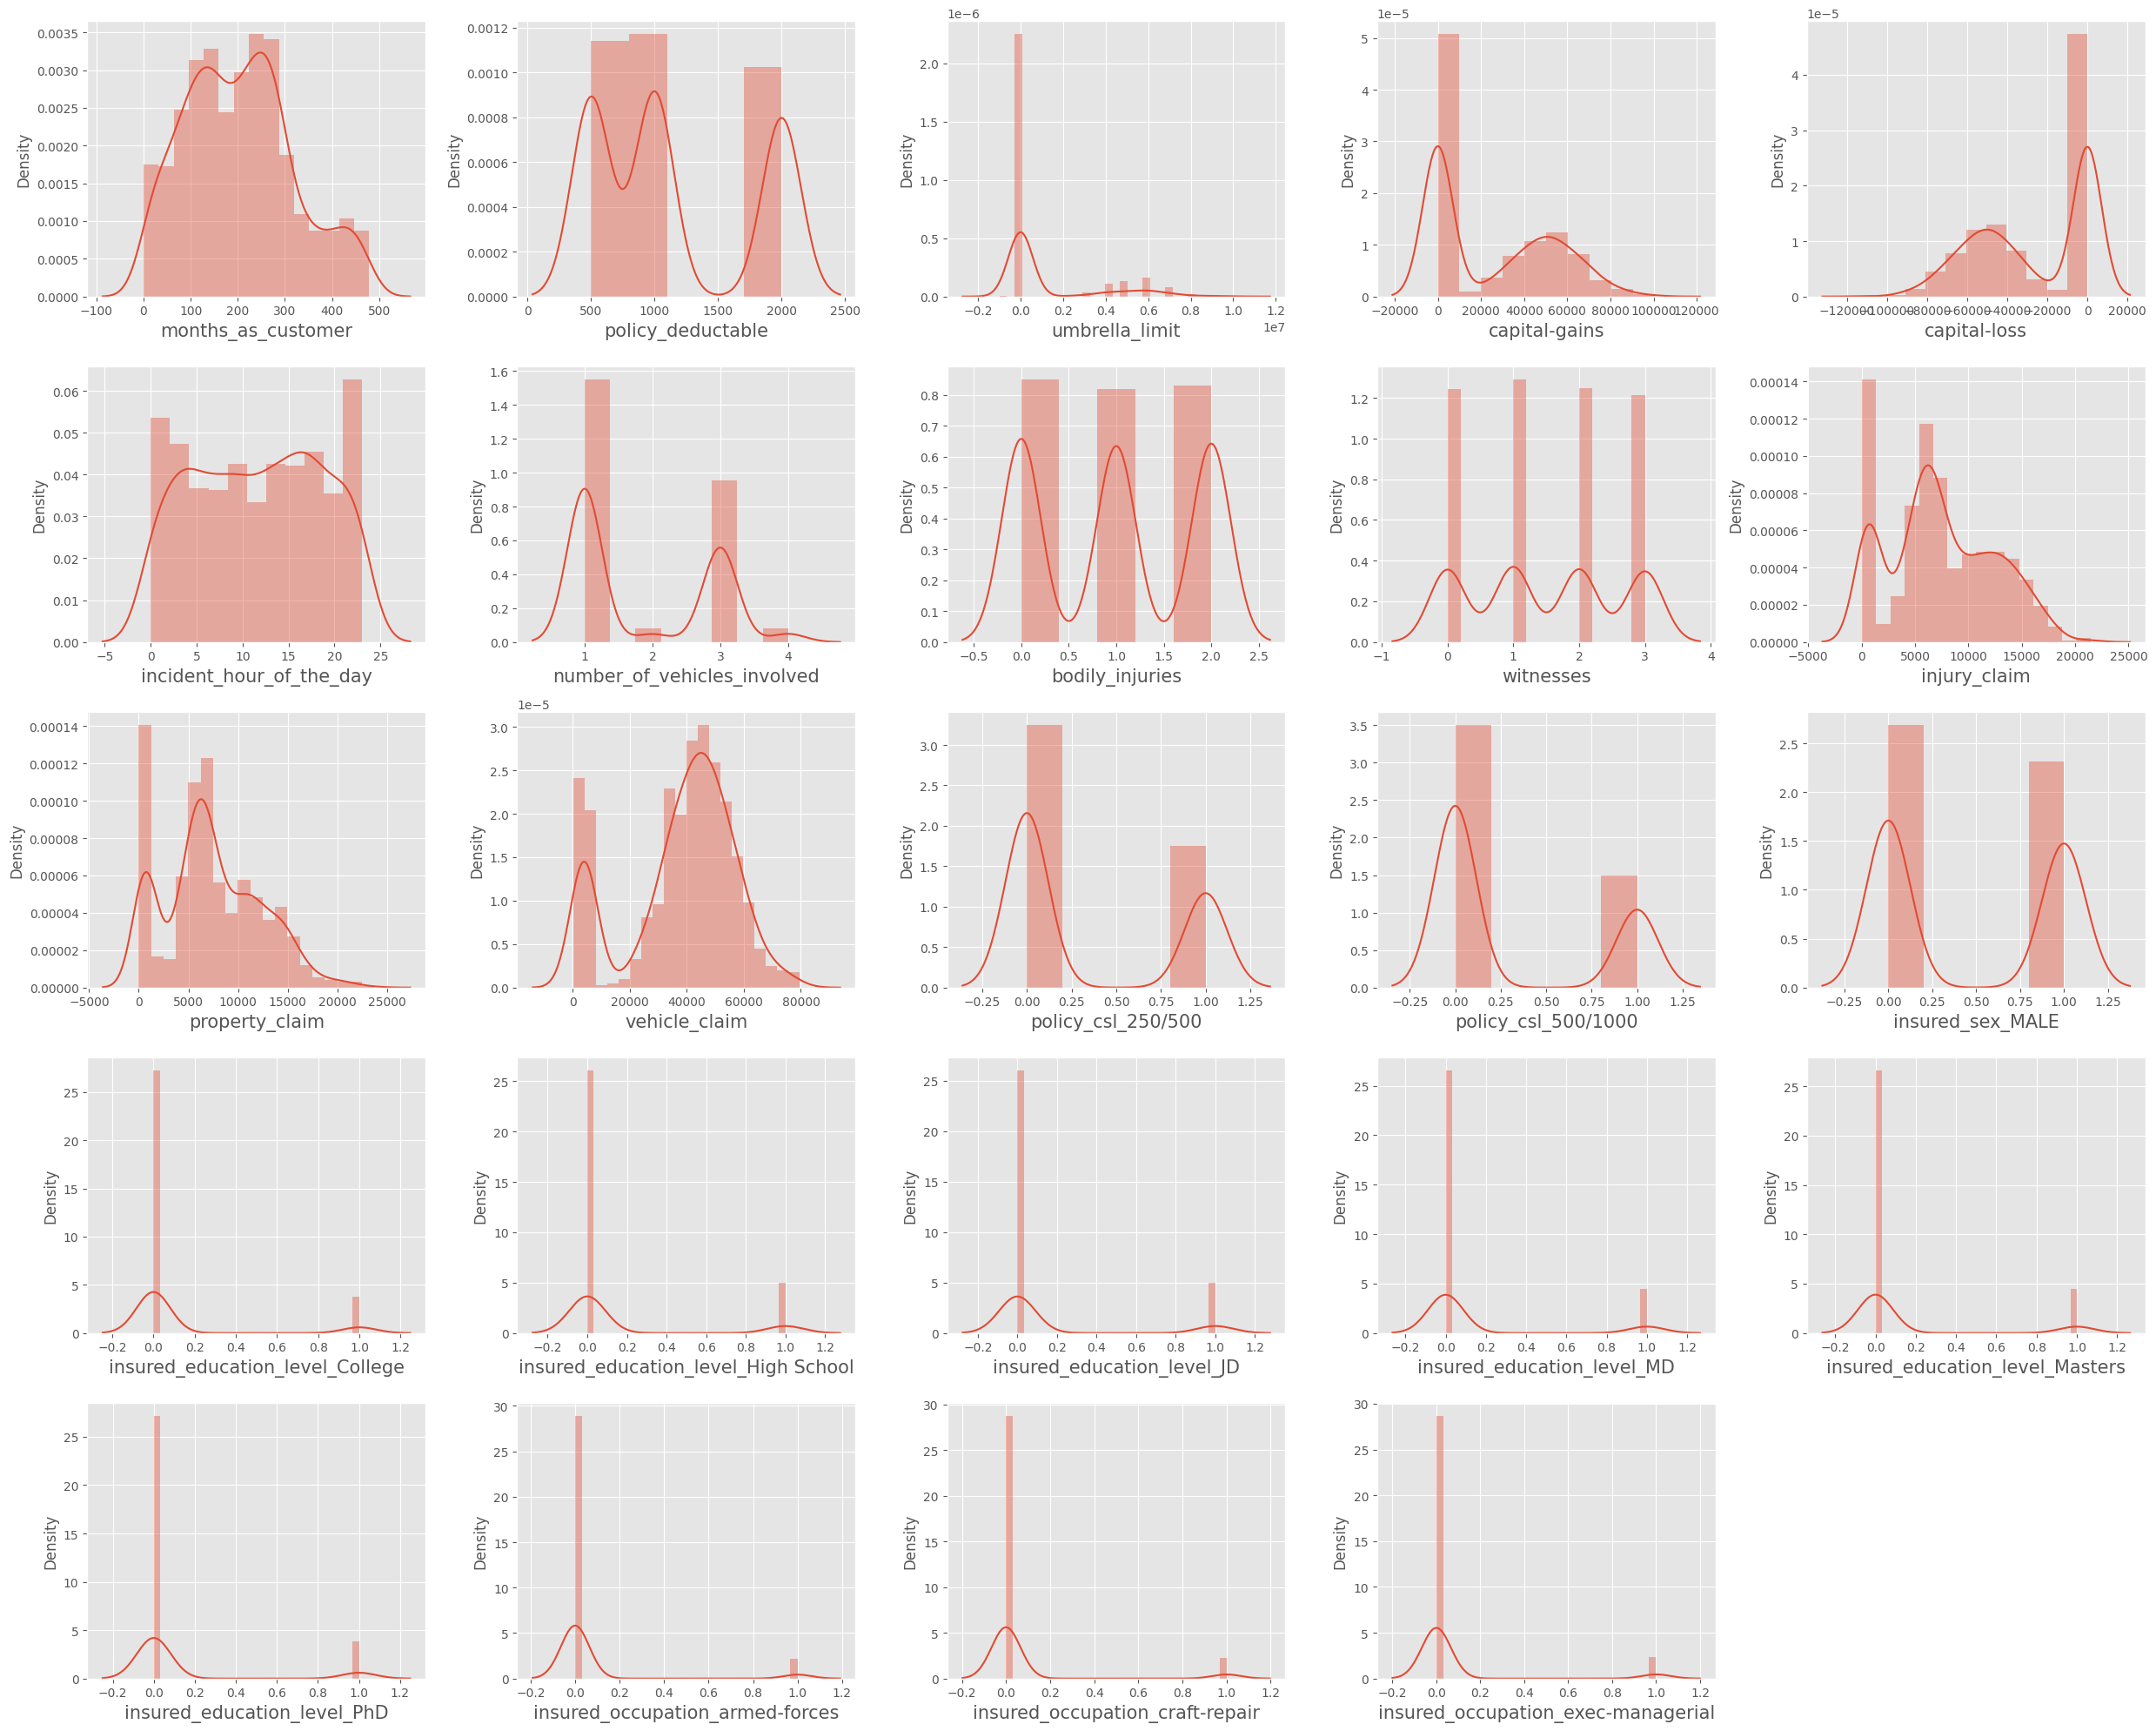

In [85]:
# Distribution plots
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

**Data looks good, let's check for outliers.**

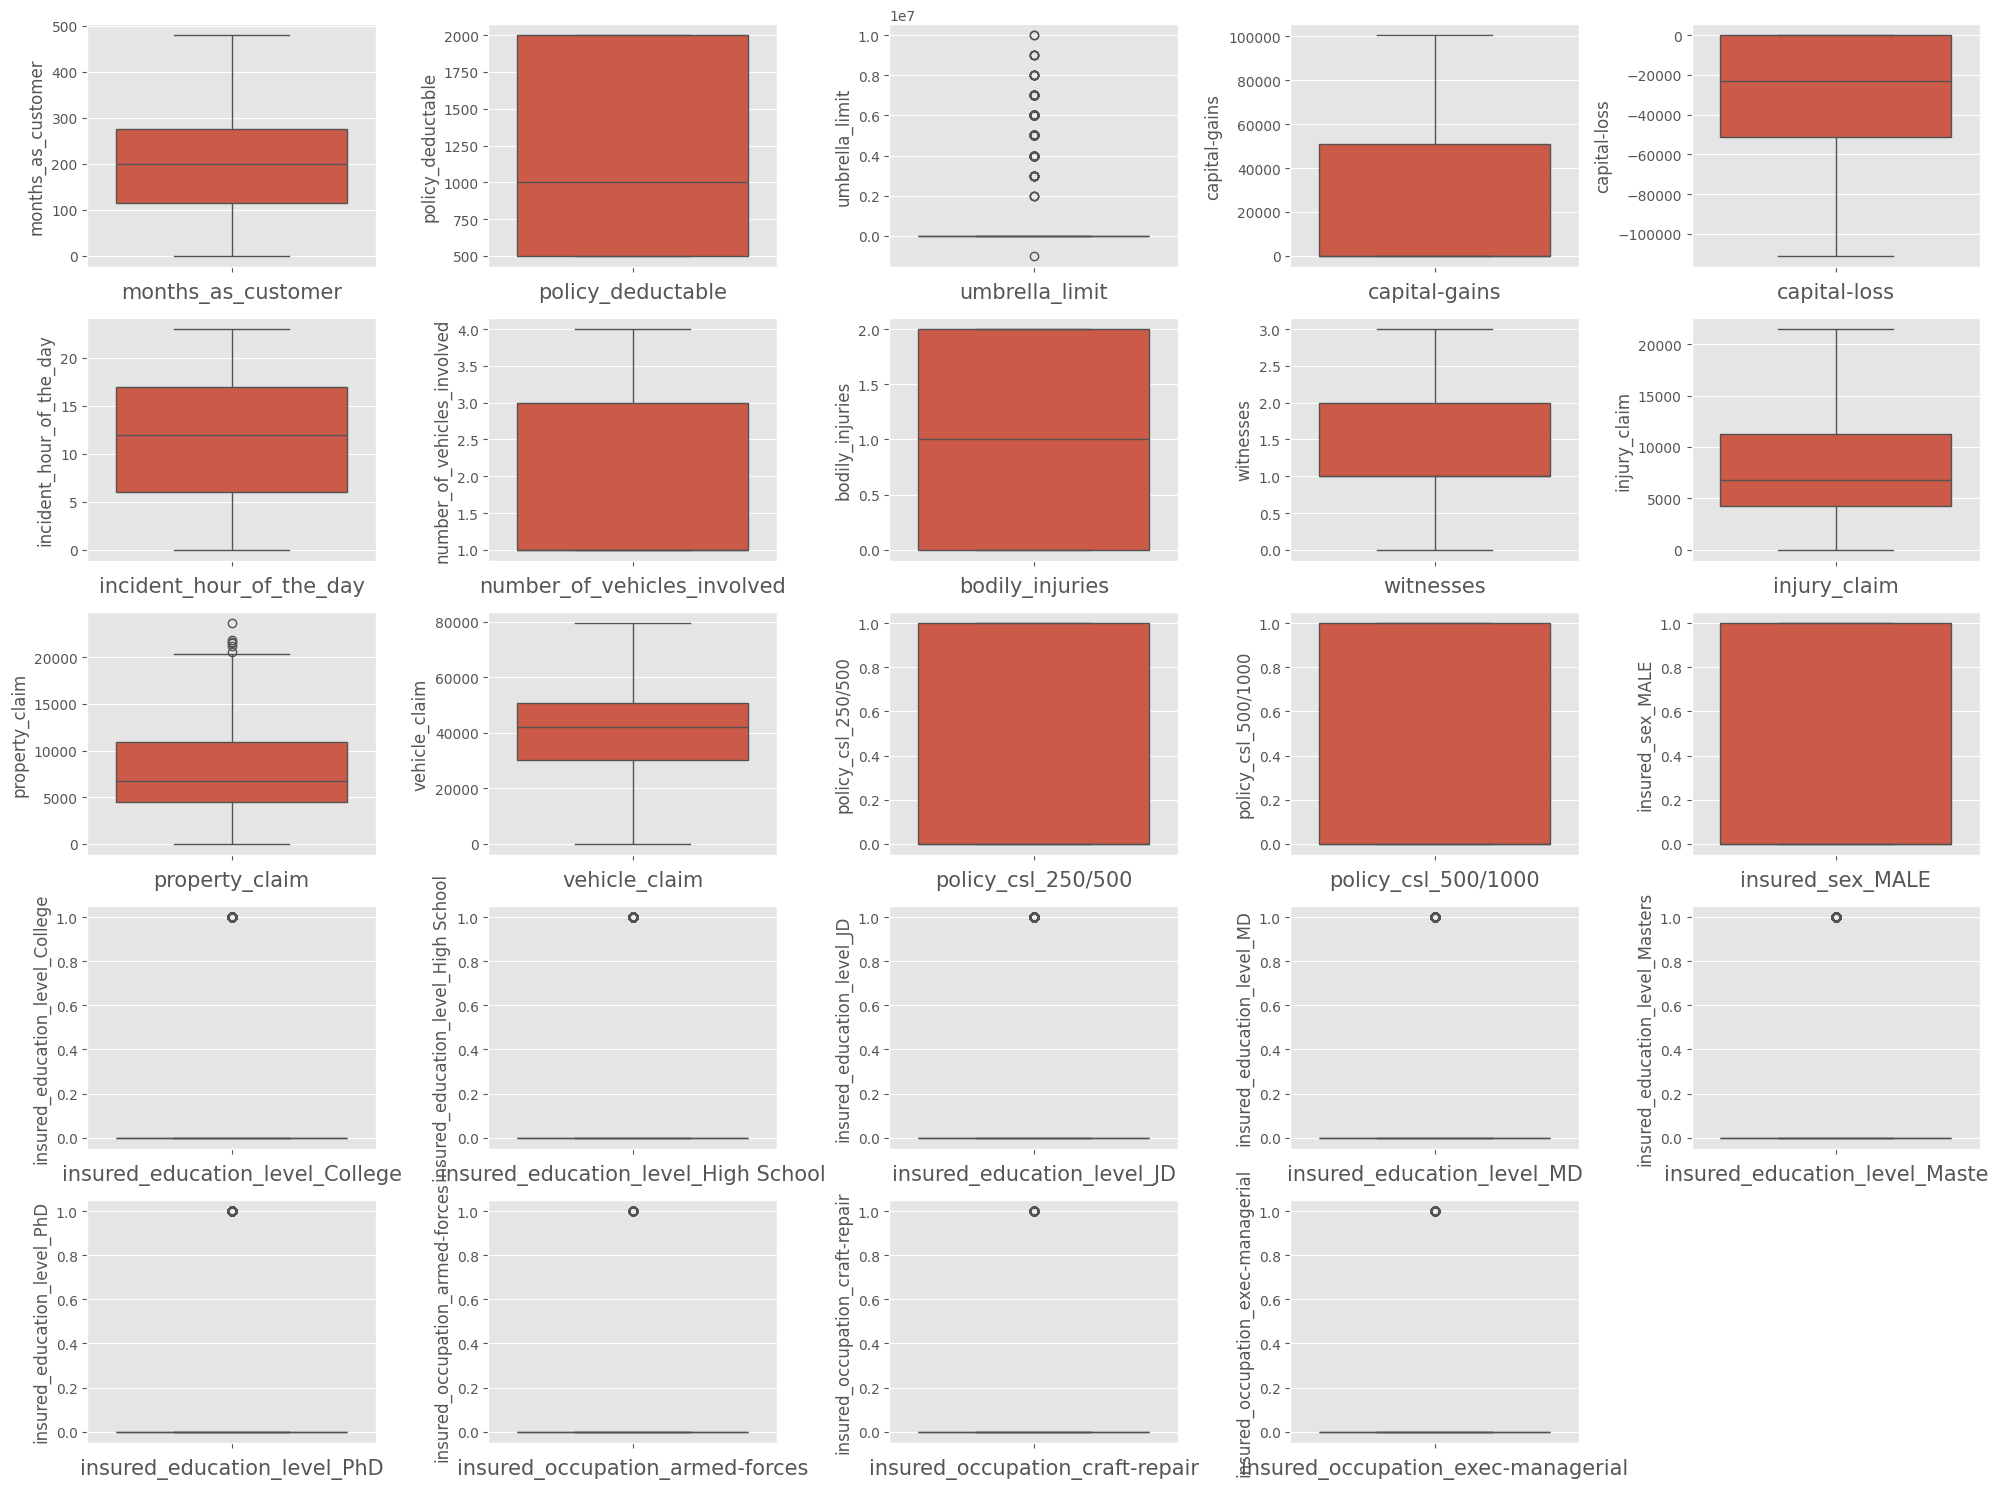

In [86]:
# Boxplots
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

**Outliers are present in some numerical columns we will scale numerical columns later**

## **Splitting Data into Training and Testing Sets**
Before standardizing the dataset, we will split it into training and test sets.

In [87]:
# Splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
386,236,1000,0,0,-62500,16,1,0,1,16710,...,False,True,False,False,False,False,False,False,False,False
59,151,2000,0,94800,-58500,12,3,1,1,11440,...,False,True,True,False,False,False,False,True,False,False
104,350,500,0,50500,0,15,3,0,0,15580,...,False,True,False,True,False,False,False,True,False,False
780,476,1000,0,42800,-68200,10,1,1,2,8980,...,False,False,False,True,False,True,False,False,False,True
810,259,2000,0,0,-58300,3,3,0,2,6340,...,False,True,False,True,False,False,True,False,False,True


## **Standardization of Numerical Features**
After splitting, we will scale the numerical features using StandardScaler to normalize the feature distribution.

In [88]:
# Scaling the numeric values in the dataset

num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
386,0.311784,-0.261488,-0.472957,-0.911633,-1.285950,0.639969,-0.814977,-1.205559,-0.424845,1.868917,-0.374326,0.352972
59,-0.449349,1.372813,-0.472957,2.459167,-1.143032,0.059937,1.140967,0.029645,-0.424845,0.802438,-0.343229,0.415988
104,1.332597,-1.078639,-0.472957,0.883993,0.947139,0.494961,1.140967,-1.205559,-1.322405,1.640241,0.085911,1.694684
780,2.460865,-0.261488,-0.472957,0.610205,-1.489607,-0.230079,-0.814977,0.029645,0.472715,0.304612,-0.598225,-0.100742
810,0.517737,1.372813,-0.472957,-0.911633,-1.135886,-1.245136,1.140967,-1.205559,0.472715,-0.229639,-0.214694,0.343520


In [89]:
# Drop the original numerical columns from X_train
X_train.drop(columns = scaled_num_df.columns, inplace = True)

# Concatenate the scaled numerical columns (scaled_num_df) back into X_train
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

# Display the first few rows of the updated X_train to verify the changes
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
386,0.311784,-0.261488,-0.472957,-0.911633,-1.285950,0.639969,-0.814977,-1.205559,-0.424845,1.868917,...,False,True,False,False,False,False,False,False,False,False
59,-0.449349,1.372813,-0.472957,2.459167,-1.143032,0.059937,1.140967,0.029645,-0.424845,0.802438,...,False,True,True,False,False,False,False,True,False,False
104,1.332597,-1.078639,-0.472957,0.883993,0.947139,0.494961,1.140967,-1.205559,-1.322405,1.640241,...,False,True,False,True,False,False,False,True,False,False
780,2.460865,-0.261488,-0.472957,0.610205,-1.489607,-0.230079,-0.814977,0.029645,0.472715,0.304612,...,False,False,False,True,False,True,False,False,False,True
810,0.517737,1.372813,-0.472957,-0.911633,-1.135886,-1.245136,1.140967,-1.205559,0.472715,-0.229639,...,False,True,False,True,False,False,True,False,False,True


## **Model Training and Evaluation**
Multiple classification models will be trained and compared

### **1. Support Vector Classifier (SVC)**
- SVC aims to find the optimal hyperplane that separates data points of different classes.
- This model works well with high-dimensional data but may require tuning of kernel parameters.

In [90]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

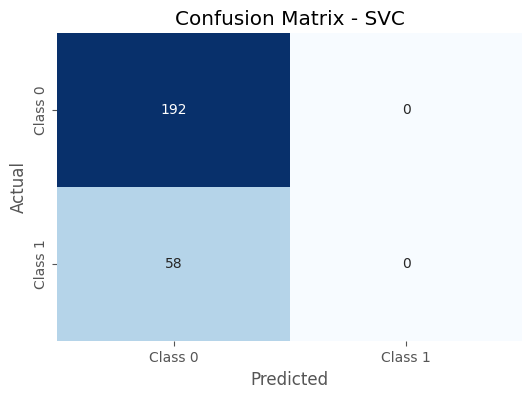

Classification Report - SVC:
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       192
           Y       0.00      0.00      0.00        58

    accuracy                           0.77       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.59      0.77      0.67       250



In [91]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()

# Classification Report
print("Classification Report - SVC:")
print(classification_report(y_test, y_pred))

# Save Accuracy and F1-Score result
svc_accuracy = accuracy_score(y_test, y_pred)
svc_f1 = f1_score(y_test, y_pred, average='weighted')

### **2. K-Nearest Neighbors (KNN)**
- KNN classifies instances based on the majority class of their nearest neighbors.
- It is simple but can be computationally expensive for large datasets.

In [92]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

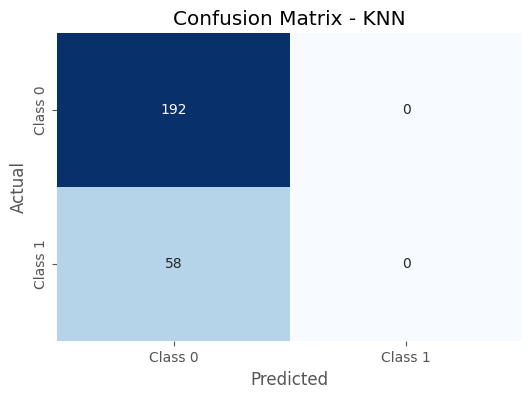

Classification Report - KNN:
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       192
           Y       0.00      0.00      0.00        58

    accuracy                           0.77       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.59      0.77      0.67       250



In [93]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

# Classification Report
print("Classification Report - KNN:")
print(classification_report(y_test, y_pred))

# Save Accuracy and F1-Score result
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred, average='weighted')

### **3. Decision Tree Classifier**
- A tree-based model that splits data based on feature importance to make decisions.
- We will also perform **hyperparameter tuning** using `GridSearchCV` to optimize tree depth, split criteria, and minimum samples per split.


In [94]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

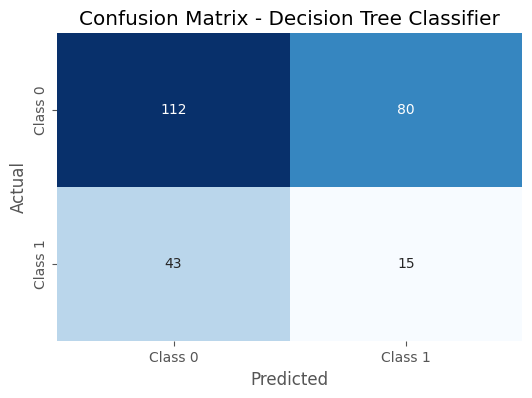

Classification Report - Decision Tree Classifier:
              precision    recall  f1-score   support

           N       0.72      0.58      0.65       192
           Y       0.16      0.26      0.20        58

    accuracy                           0.51       250
   macro avg       0.44      0.42      0.42       250
weighted avg       0.59      0.51      0.54       250



In [95]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

# Classification Report
print("Classification Report - Decision Tree Classifier:")
print(classification_report(y_test, y_pred))

# Save Accuracy and F1-Score result
dtc_accuracy = accuracy_score(y_test, y_pred)
dtc_f1 = f1_score(y_test, y_pred, average='weighted')

In [96]:
# hyper parameter tuning

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [97]:
# best parameters and best score

print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Best Cross-Validation Score for Decision Tree:", grid_search.best_score_)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best Cross-Validation Score for Decision Tree: 0.812


In [98]:
# best estimator

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

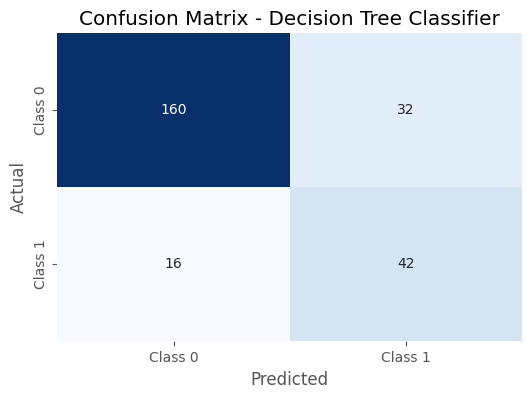

Classification Report - Decision Tree Classifier:
              precision    recall  f1-score   support

           N       0.91      0.83      0.87       192
           Y       0.57      0.72      0.64        58

    accuracy                           0.81       250
   macro avg       0.74      0.78      0.75       250
weighted avg       0.83      0.81      0.82       250



In [99]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

# Classification Report
print("Classification Report - Decision Tree Classifier:")
print(classification_report(y_test, y_pred))

# Save Accuracy and F1-Score result
dtc_accuracy = accuracy_score(y_test, y_pred)
dtc_f1 = f1_score(y_test, y_pred, average='weighted')


### **4. Random Forest Classifier**
- An ensemble model that combines multiple decision trees to improve accuracy and reduce overfitting.
- We will evaluate its performance using accuracy, confusion matrix, and classification report.

In [100]:
rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

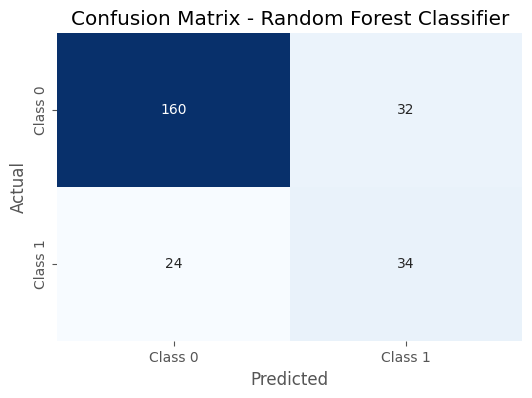

Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           N       0.87      0.83      0.85       192
           Y       0.52      0.59      0.55        58

    accuracy                           0.78       250
   macro avg       0.69      0.71      0.70       250
weighted avg       0.79      0.78      0.78       250



In [101]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# Classification Report
print("Classification Report - Random Forest Classifier:")
print(classification_report(y_test, y_pred))

# Save Accuracy and F1-Score result
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1 = f1_score(y_test, y_pred, average='weighted')

### **5. AdaBoost Classifier**
- An adaptive boosting algorithm that sequentially improves weak classifiers.
- We will use `GridSearchCV` to fine-tune the number of estimators and learning rate.

In [102]:
# AdaBoost with Decision Tree as base estimator
ada = AdaBoostClassifier(estimator=dtc)

# Hyperparameter tuning
parameters = {
    'n_estimators': [50, 70],
    'learning_rate': [0.001, 0.01],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs=-1, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                           max_depth=3,
                                                                           min_samples_leaf=6)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01],
                         'n_estimators': [50, 70]},
             verbose=1)

In [103]:
# Best parameters and best score
print("Best Parameters for AdaBoost:", grid_search.best_params_)
print("Best Cross-Validation Score for AdaBoost:", grid_search.best_score_)

Best Parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Cross-Validation Score for AdaBoost: 0.812


In [104]:
# Best estimator
ada = grid_search.best_estimator_

# Predictions
y_pred = ada.predict(X_test)

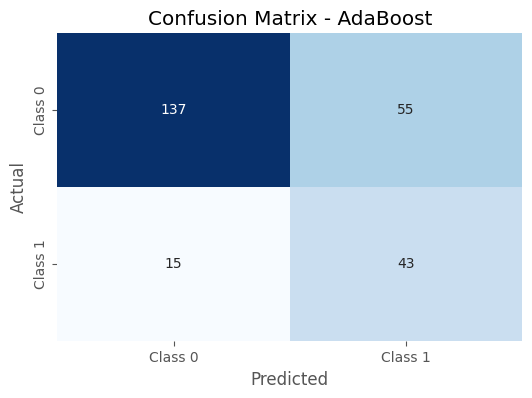

Classification Report - AdaBoost:
              precision    recall  f1-score   support

           N       0.90      0.71      0.80       192
           Y       0.44      0.74      0.55        58

    accuracy                           0.72       250
   macro avg       0.67      0.73      0.67       250
weighted avg       0.79      0.72      0.74       250



In [105]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

# Classification Report
print("Classification Report - AdaBoost:")
print(classification_report(y_test, y_pred))

# Save accuracy and F1-Score for comparison
ada_accuracy = accuracy_score(y_test, y_pred)
ada_f1 = f1_score(y_test, y_pred, average='weighted')

### **6. Gradient Boosting Classifier**
- An ensemble method that improves prediction performance by minimizing errors iteratively.
- This method is powerful but may be prone to overfitting.

In [106]:
# Gradient Boosting Model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predictions
y_pred = gb.predict(X_test)

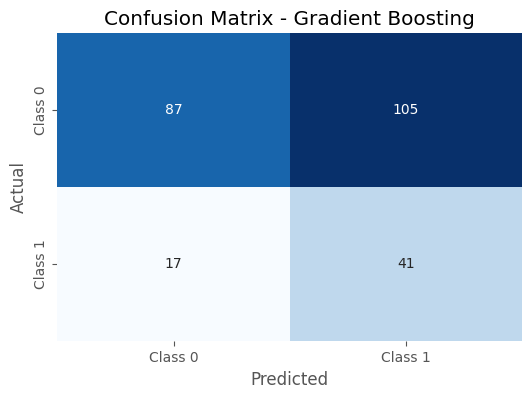

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           N       0.84      0.45      0.59       192
           Y       0.28      0.71      0.40        58

    accuracy                           0.51       250
   macro avg       0.56      0.58      0.49       250
weighted avg       0.71      0.51      0.54       250



In [107]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# Classification Report
print("Classification Report - Gradient Boosting:")
print(classification_report(y_test, y_pred))

# Save accuracy and F1-Score for comparison
gb_accuracy = accuracy_score(y_test, y_pred)
gb_f1 = f1_score(y_test, y_pred, average='weighted')

### **7. Stochastic Gradient Boosting (SGB)**
- A variation of gradient boosting that introduces randomness for improved generalization.

In [108]:
# Stochastic Gradient Boosting Model
sgb = GradientBoostingClassifier(subsample=0.90, max_features=0.70)
sgb.fit(X_train, y_train)

# Predictions
y_pred = sgb.predict(X_test)

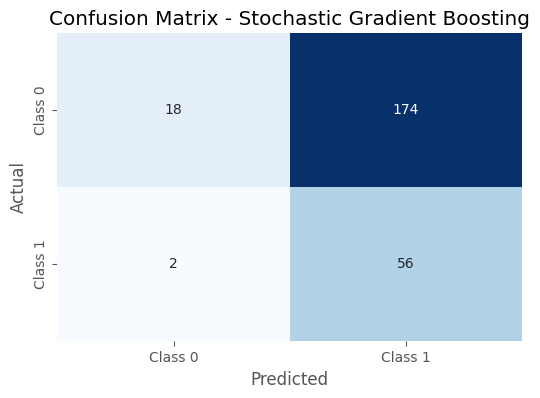

Classification Report - Stochastic Gradient Boosting:
              precision    recall  f1-score   support

           N       0.90      0.09      0.17       192
           Y       0.24      0.97      0.39        58

    accuracy                           0.30       250
   macro avg       0.57      0.53      0.28       250
weighted avg       0.75      0.30      0.22       250



In [109]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stochastic Gradient Boosting')
plt.show()

# Classification Report
print("Classification Report - Stochastic Gradient Boosting:")
print(classification_report(y_test, y_pred))

# Save accuracy and F1-Score for comparison
sgb_accuracy = accuracy_score(y_test, y_pred)
sgb_f1 = f1_score(y_test, y_pred, average='weighted')

### **8. XGBoost Classifier**
- A highly optimized version of gradient boosting that is efficient and scalable.
- We will also conduct **hyperparameter tuning** to optimize tree depth, number of estimators, and learning rate.

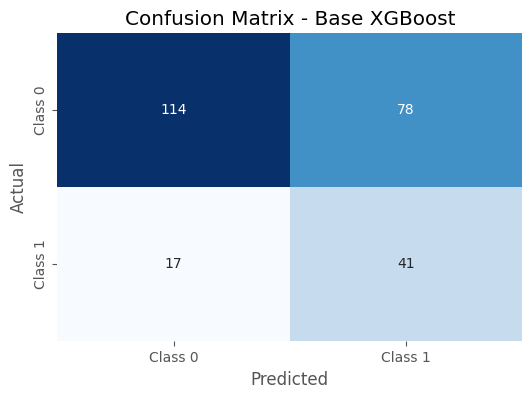

Classification Report - Base XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.59      0.71       192
           1       0.34      0.71      0.46        58

    accuracy                           0.62       250
   macro avg       0.61      0.65      0.58       250
weighted avg       0.75      0.62      0.65       250



In [110]:
# Convert target variable to binary format
y_train = (y_train == 'Y').astype(int)
y_test = (y_test == 'Y').astype(int)

# Base XGBoost Model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Base XGBoost')
plt.show()

# Classification Report
print("Classification Report - Base XGBoost:")
print(classification_report(y_test, y_pred))

# Save accuracy and F1-Score for comparison
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average='weighted')

In [111]:
# Hyperparameter Tuning
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.1]
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for XGBoost:", grid_search.best_params_)
print("Best Cross-Validation Score for XGBoost:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Cross-Validation Score for XGBoost: 0.7786666666666667


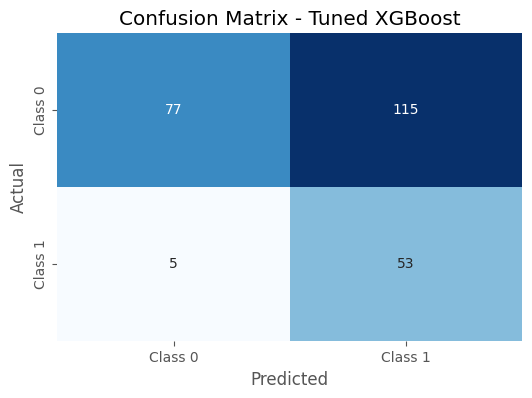

Classification Report - Tuned XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.40      0.56       192
           1       0.32      0.91      0.47        58

    accuracy                           0.52       250
   macro avg       0.63      0.66      0.52       250
weighted avg       0.79      0.52      0.54       250



In [112]:
# Best estimator
best_xgb = grid_search.best_estimator_

# Predictions with the best model
y_pred = best_xgb.predict(X_test)

# Confusion Matrix for tuned model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned XGBoost')
plt.show()

# Classification Report for tuned model
print("Classification Report - Tuned XGBoost:")
print(classification_report(y_test, y_pred))

# Save accuracy and F1-Score for comparison
best_xgb_accuracy = accuracy_score(y_test, y_pred)
best_xgb_f1 = f1_score(y_test, y_pred, average='weighted')

### **9. CatBoost Classifier**
- A gradient boosting model specifically optimized for categorical data.
- CatBoost reduces the need for extensive preprocessing and works well with categorical features.

In [113]:
# CatBoost Model
cat = CatBoostClassifier(iterations=10, verbose=0)
cat.fit(X_train, y_train)

# Predictions
y_pred = cat.predict(X_test)

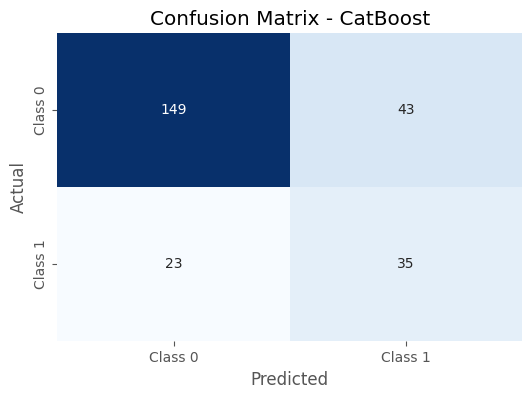

Classification Report - CatBoost:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       192
           1       0.45      0.60      0.51        58

    accuracy                           0.74       250
   macro avg       0.66      0.69      0.67       250
weighted avg       0.77      0.74      0.75       250



In [114]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()

# Classification Report
print("Classification Report - CatBoost:")
print(classification_report(y_test, y_pred))

# Save accuracy and F1-Score for comparison
cat_accuracy = accuracy_score(y_test, y_pred)
cat_f1 = f1_score(y_test, y_pred, average='weighted')

### **10. Extra Trees Classifier**
- Similar to Random Forest but with additional randomness in feature selection.
- Often leads to better generalization and improved accuracy.

In [115]:
# Extra Trees Model
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# Predictions
y_pred = etc.predict(X_test)

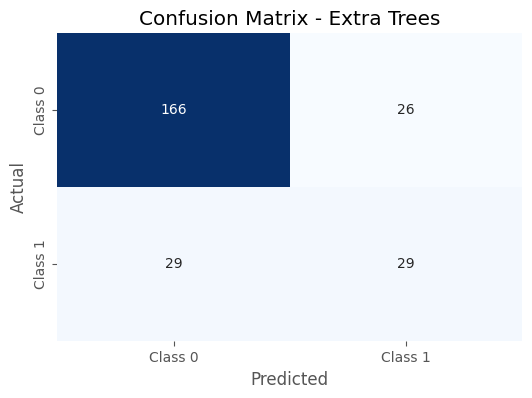

Classification Report - Extra Trees:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       192
           1       0.53      0.50      0.51        58

    accuracy                           0.78       250
   macro avg       0.69      0.68      0.69       250
weighted avg       0.78      0.78      0.78       250



In [116]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Extra Trees')
plt.show()

# Classification Report
print("Classification Report - Extra Trees:")
print(classification_report(y_test, y_pred))

# Save accuracy and F1-Score for comparison
etc_accuracy = accuracy_score(y_test, y_pred)
etc_f1 = f1_score(y_test, y_pred, average='weighted')

### **11. LGBM Classifier**
- A fast and efficient boosting algorithm designed for large datasets.
- Uses leaf-wise growth instead of level-wise, making it faster than traditional boosting methods.

In [117]:
# LGBM Model
lgbm = LGBMClassifier(learning_rate=1, verbose=-1)
lgbm.fit(X_train, y_train)

# Predictions
y_pred = lgbm.predict(X_test)

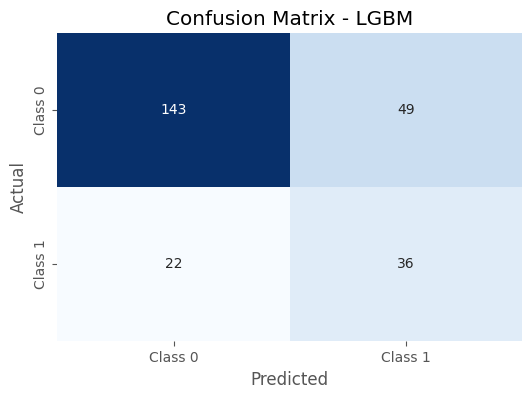

Classification Report - LGBM:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       192
           1       0.42      0.62      0.50        58

    accuracy                           0.72       250
   macro avg       0.65      0.68      0.65       250
weighted avg       0.76      0.72      0.73       250



In [118]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LGBM')
plt.show()

# Classification Report
print("Classification Report - LGBM:")
print(classification_report(y_test, y_pred))

# Save accuracy and F1-Score for comparison
lgbm_accuracy = accuracy_score(y_test, y_pred)
lgbm_f1 = f1_score(y_test, y_pred, average='weighted')

### **12. Voting Classifier**
- A meta-classifier that combines multiple models to improve performance.
- It aggregates predictions from different classifiers to provide a more stable output.

In [119]:
# Voting Classifier
classifiers = [
    ('Support Vector Classifier', svc),
    ('KNN', knn),
    ('Decision Tree', dtc),
    ('Random Forest', rfc),
    ('Ada Boost', ada),
    ('XGBoost', xgb),
    ('Gradient Boosting', gb),
    ('Stochastic Gradient Boosting', sgb),
    ('CatBoost', cat),
    ('Extra Trees', etc),
    ('LGBM', lgbm)
]

vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)

# Predictions
y_pred = vc.predict(X_test)

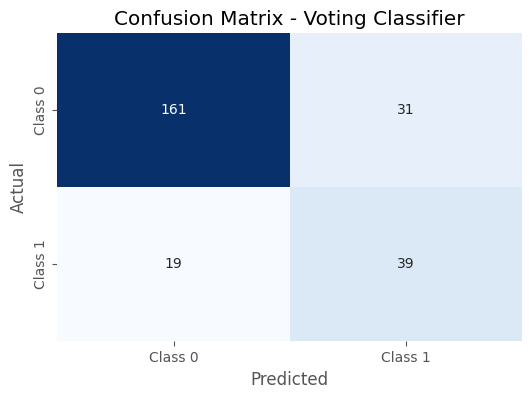

Classification Report - Voting Classifier:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       192
           1       0.56      0.67      0.61        58

    accuracy                           0.80       250
   macro avg       0.73      0.76      0.74       250
weighted avg       0.82      0.80      0.81       250



In [120]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Voting Classifier')
plt.show()

# Classification Report
print("Classification Report - Voting Classifier:")
print(classification_report(y_test, y_pred))

# Save accuracy and F1-Score for comparison
vc_accuracy = accuracy_score(y_test, y_pred)
vc_f1 = f1_score(y_test, y_pred, average='weighted')

## **Model Performance Comparison**
After training and evaluating all the models, we will compare their performance based on **accuracy** and **F1-Score**. This comparison will help us identify the best-performing model for the given dataset.


In [121]:
# Create DataFrame for comparison
model_comparison = pd.DataFrame({
    'Model': ['SVC', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stochastic GB', 'XGBoost', 'CatBoost', 'Extra Trees', 'LGBM', 'Voting Classifier'],
    'Accuracy': [svc_accuracy, knn_accuracy, dtc_accuracy, rfc_accuracy, ada_accuracy, gb_accuracy, sgb_accuracy, xgb_accuracy, cat_accuracy, etc_accuracy, lgbm_accuracy, vc_accuracy],
    'F1-Score': [svc_f1, knn_f1, dtc_f1, rfc_f1, ada_f1, gb_f1, sgb_f1, xgb_f1, cat_f1, etc_f1, lgbm_f1, vc_f1]
})

# Sort by F1-Score
model_comparison = model_comparison.sort_values(by='F1-Score', ascending=False)

print("Model Comparison Based on Accuracy and F1-Score:")
print(model_comparison)

Model Comparison Based on Accuracy and F1-Score:
                Model  Accuracy  F1-Score
2       Decision Tree     0.808  0.815462
11  Voting Classifier     0.800  0.806149
3       Random Forest     0.776  0.780843
9         Extra Trees     0.780  0.777932
8            CatBoost     0.736  0.748159
4            AdaBoost     0.720  0.739618
10               LGBM     0.716  0.732072
0                 SVC     0.768  0.667222
1                 KNN     0.768  0.667222
7             XGBoost     0.620  0.649598
5   Gradient Boosting     0.512  0.544714
6       Stochastic GB     0.296  0.220637
